**Problem Statement:**
Given data about COVID-19 patients, write code to visualize the impact and
analyze the trend of rate of infection and recovery as well as make predictions about the number of cases expected a week in future based on the current trends.

**Guidelines:**
● Use pandas to accumulate data from multiple data files.
● Use plotly (visualization library) to create interactive visualizations.
Use Facebook prophet library to make time series models.
● Visualize the prediction by combining these technologies.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [55]:
df = pd.read_csv('/content/covid.csv', parse_dates=['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


the impact and analyze the trend of rate of infection and recovery

# **Visualization**

In [56]:
world = df[df['Date']=='2020-04-20']
world.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
23229,NaN,Afghanistan,33.93911,67.709953,2020-04-20,1026,36,135,855,Eastern Mediterranean
23230,NaN,Albania,41.15330,20.168300,2020-04-20,584,26,327,231,Europe
23231,NaN,Algeria,28.03390,1.659600,2020-04-20,2718,384,1099,1235,Africa
23232,NaN,Andorra,42.50630,1.521800,2020-04-20,717,37,248,432,Europe
23233,NaN,Angola,-11.20270,17.873900,2020-04-20,24,2,6,16,Africa


In [57]:
world = pd.DataFrame(df)
world_grouped = world.groupby('Country/Region').sum(numeric_only=True)[['Confirmed', 'Deaths', 'Recovered', 'Active']]

print(world_grouped)

                    Confirmed  Deaths  Recovered   Active
Country/Region                                           
Afghanistan           1936390   49098     798240  1089052
Albania                196702    5708     118877    72117
Algeria               1179755   77972     755897   345886
Andorra                 94404    5423      69074    19907
Angola                  22662    1078       6573    15011
...                       ...     ...        ...      ...
West Bank and Gaza     233461    1370      61124   170967
Western Sahara            901      63        648      190
Yemen                   67180   17707      23779    25694
Zambia                 129421    2643      83611    43167
Zimbabwe                50794     881      12207    37706

[187 rows x 4 columns]


## **Visualization**

In [58]:
import plotly.express as px
figure = px.choropleth(
    world_grouped,
    locations=world_grouped.index,
    locationmode='country names',
    title="Countries with Confirmed Cases",
    color='Confirmed',
    range_color=[world_grouped['Confirmed'].min(), world_grouped['Confirmed'].max()],
    hover_name=world_grouped.index,
    color_continuous_scale=px.colors.sequential.Plasma
)

figure.show()


In [59]:
import plotly.express as px
figure = px.choropleth(
    world_grouped,
    locations=world_grouped.index,
    locationmode='country names',
    title="Countries with Deaths Cases",
    color='Deaths',
    range_color=[world_grouped['Deaths'].min(), world_grouped['Deaths'].max()],
    hover_name=world_grouped.index,
    color_continuous_scale=px.colors.sequential.Plasma
)

figure.show()


In [60]:
#
figure = px.choropleth(
    world_grouped,
    locations=world_grouped.index,
    locationmode='country names',
    title="Countries with Recovered Cases",
    color='Recovered',
    range_color=[world_grouped['Recovered'].min(), world_grouped['Recovered'].max()],
    hover_name=world_grouped.index,
    color_continuous_scale=px.colors.sequential.Plasma
)

figure.show()

In [61]:
#
figure = px.choropleth(
    world_grouped,
    locations=world_grouped.index,
    locationmode='country names',
    title="Countries with Active Cases",
    color='Active',
    range_color=[world_grouped['Active'].min(), world_grouped['Active'].max()],
    hover_name=world_grouped.index,
    color_continuous_scale=px.colors.sequential.Plasma
)

figure.show()

In [62]:
#Trend of active cases of covid spread


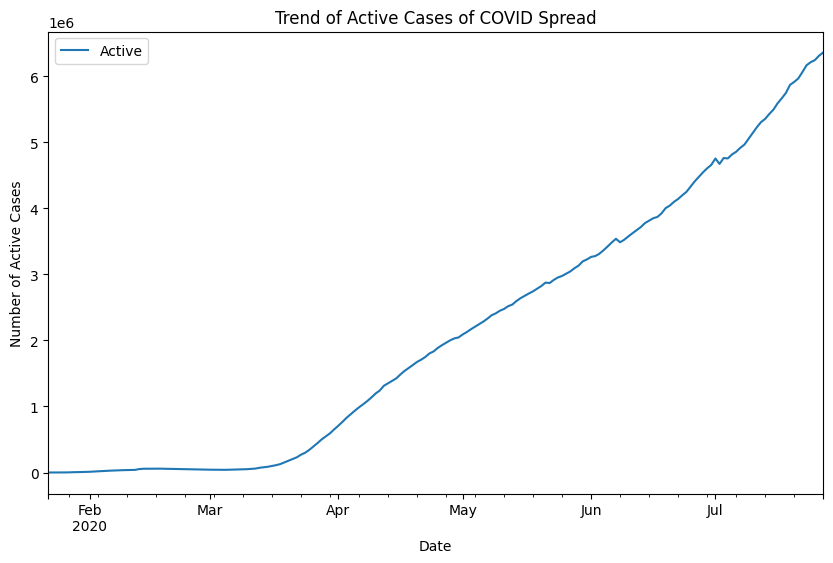

In [63]:
# Trend of active cases of covid spread

# Get the active cases for each date
active_cases = df.groupby('Date')['Active'].sum().reset_index()

# Plot the trend of active cases
active_cases.plot(x='Date', y='Active', figsize=(10, 6))
plt.title('Trend of Active Cases of COVID Spread')
plt.xlabel('Date')
plt.ylabel('Number of Active Cases')
plt.show()


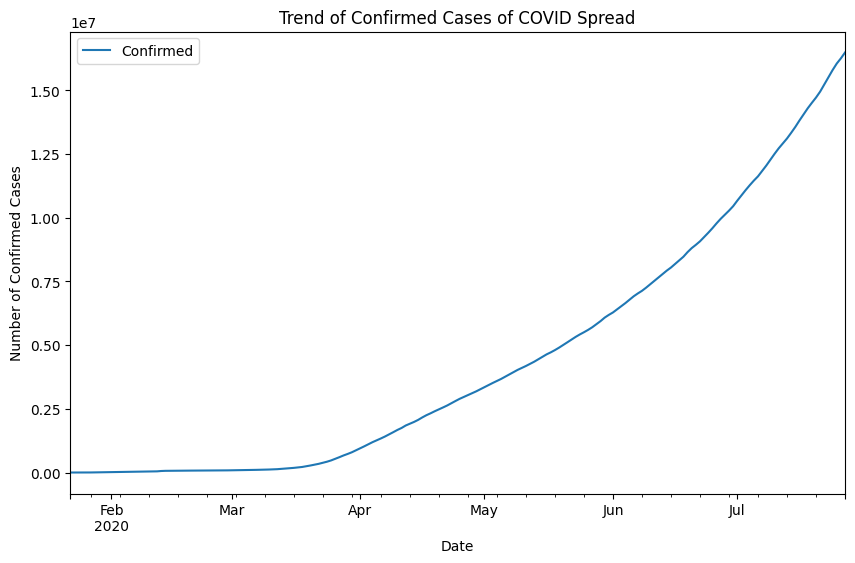

In [64]:


# Get the confirmed cases for each date
confirmed_cases = df.groupby('Date')['Confirmed'].sum().reset_index()

# Plot the trend of confirmed cases
confirmed_cases.plot(x='Date', y='Confirmed', figsize=(10, 6))
plt.title('Trend of Confirmed Cases of COVID Spread')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.show()


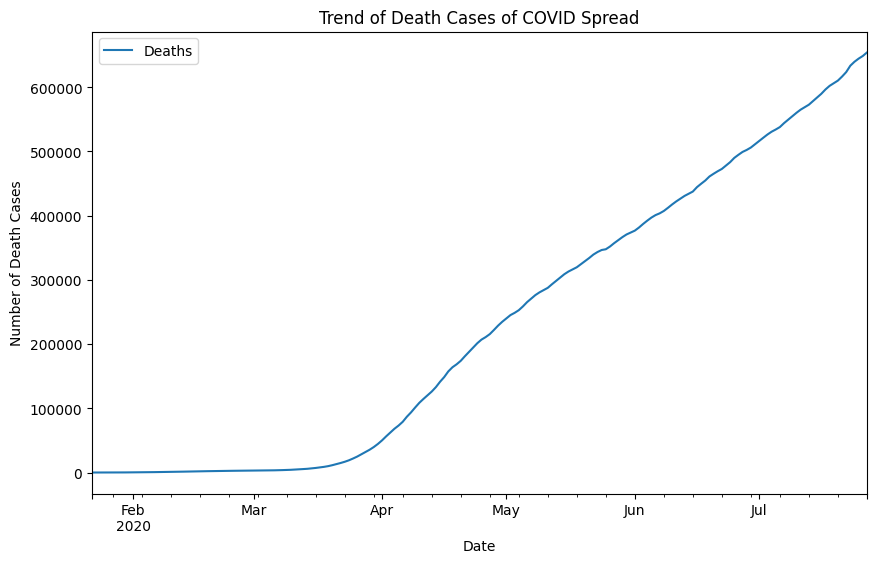

In [65]:
# Get the confirmed cases for each date
confirmed_cases = df.groupby('Date')['Deaths'].sum().reset_index()

# Plot the trend of confirmed cases
confirmed_cases.plot(x='Date', y='Deaths', figsize=(10, 6))
plt.title('Trend of Death Cases of COVID Spread')
plt.xlabel('Date')
plt.ylabel('Number of Death Cases')
plt.show()


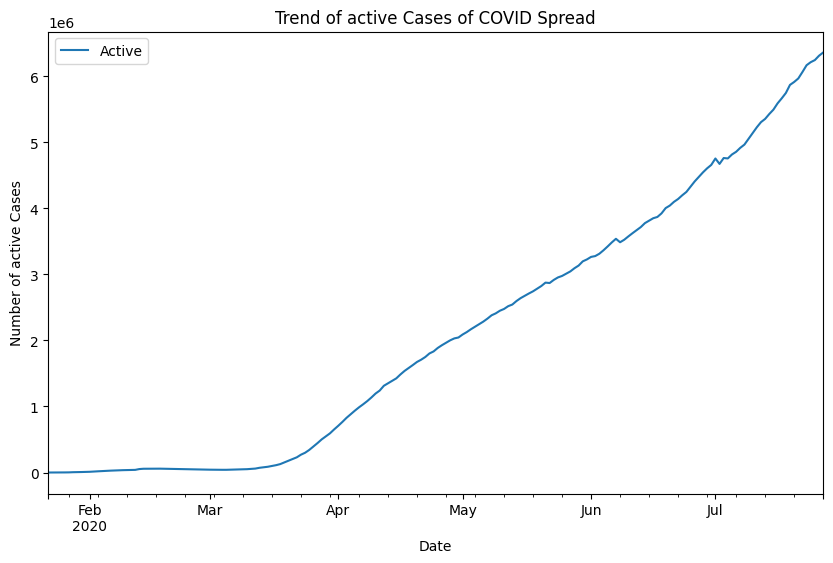

In [66]:
# Get the active cases for each date
confirmed_cases = df.groupby('Date')['Active'].sum().reset_index()

# Plot the trend of confirmed cases
confirmed_cases.plot(x='Date', y='Active', figsize=(10, 6))
plt.title('Trend of active Cases of COVID Spread')
plt.xlabel('Date')
plt.ylabel('Number of active Cases')
plt.show()


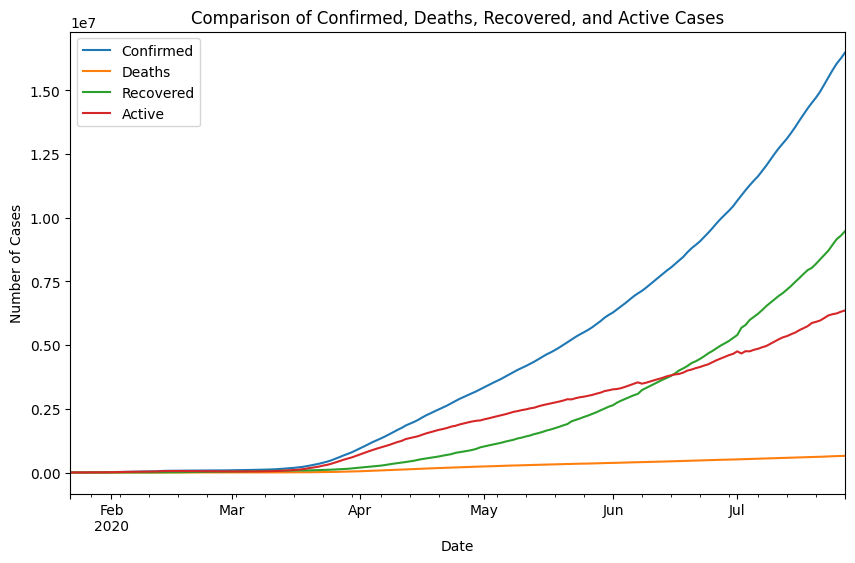

In [67]:
#  make comparison 'Confirmed', 'Deaths', 'Recovered', 'Active'

# Create a new DataFrame with only the desired columns
df_comparison = df[['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active']]

# Group the DataFrame by date and calculate the sum of each column
df_comparison = df_comparison.groupby('Date').sum()

# Plot the data as a line chart
df_comparison.plot(figsize=(10, 6))
plt.title('Comparison of Confirmed, Deaths, Recovered, and Active Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()


# **FB Forecasting**

In [68]:
# Prepare separate DataFrames for each case
df_active = df[['Date', 'Active']].copy()
df_confirmed = df[['Date', 'Confirmed']].copy()
df_deaths = df[['Date', 'Deaths']].copy()
df_recovered = df[['Date', 'Recovered']].copy()

In [69]:
#'Date' as 'ds' and 'Confirmed' as y


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpved0cvw_/pwxo3kji.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpved0cvw_/feupclwu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58252', 'data', 'file=/tmp/tmpved0cvw_/pwxo3kji.json', 'init=/tmp/tmpved0cvw_/feupclwu.json', 'output', 'file=/tmp/tmpved0cvw_/prophet_modelw4ss2mxp/prophet_model-20240629125641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:56:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:56:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds          yhat    yhat_lower     yhat_upper
190 2020-07-30  63767.558564 -80315.037920  222678.534647
191 2020-07-31  64558.726849 -98817.325555  215715.647106
192 2020-08-01  65333.028395 -89369.327840  222552.690887
193 2020-08-02  66062.674438 -80848.049998  221108.985064
194 2020-08-03  66778.020921 -99129.461737  229880.724551


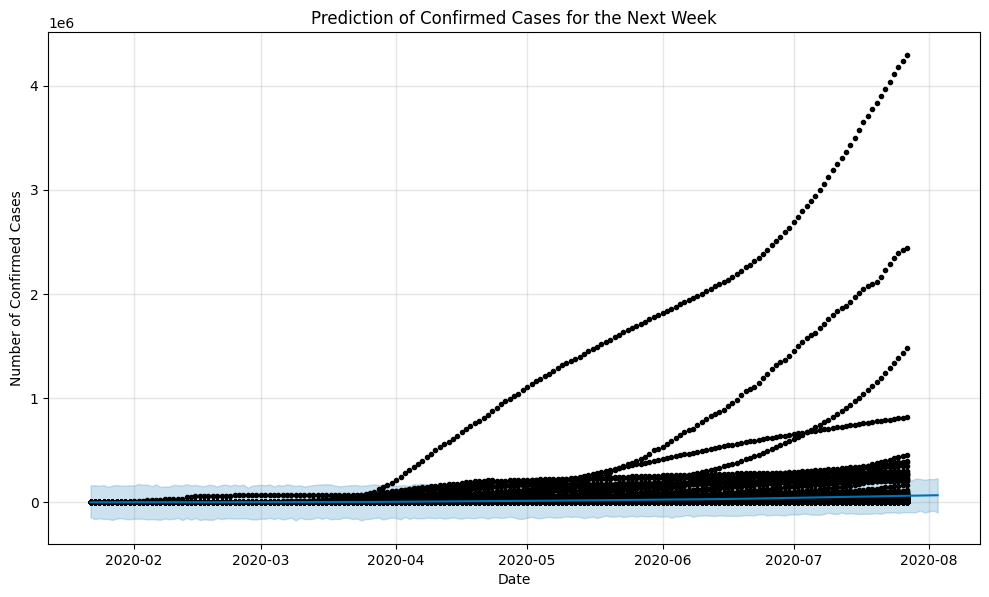

In [70]:
# Rename columns for Prophet compatibility
df_confirmed.rename(columns={'Date': 'ds', 'Confirmed': 'y'}, inplace=True)

# Create the Prophet model
model_confirmed = Prophet()

# Fit the model
model_confirmed.fit(df_confirmed)

# Make future dataframe for the next 7 days
future_confirmed = model_confirmed.make_future_dataframe(periods=7)

# Make predictions
forecast_confirmed = model_confirmed.predict(future_confirmed)

# Display the forecasted values
print(forecast_confirmed[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot the predictions
fig_confirmed = model_confirmed.plot(forecast_confirmed)
plt.title('Prediction of Confirmed Cases for the Next Week')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpved0cvw_/a8hhexsj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpved0cvw_/joug8cnx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83479', 'data', 'file=/tmp/tmpved0cvw_/a8hhexsj.json', 'init=/tmp/tmpved0cvw_/joug8cnx.json', 'output', 'file=/tmp/tmpved0cvw_/prophet_modelb2d1rlr3/prophet_model-20240629125646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:56:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:56:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds          yhat    yhat_lower     yhat_upper
190 2020-07-30  24499.239599 -74812.144621  122051.655772
191 2020-07-31  24739.779842 -68991.995067  119253.963408
192 2020-08-01  24960.608806 -81378.821969  121046.524915
193 2020-08-02  25200.461378 -74369.975688  122162.619660
194 2020-08-03  25389.823187 -73588.024210  123888.904447


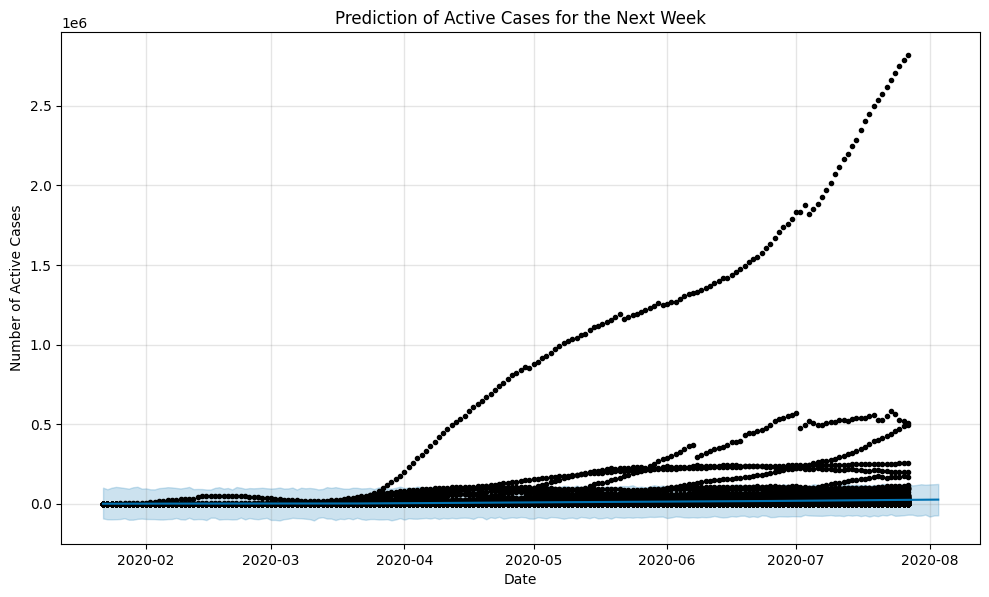

In [71]:
# Rename columns for Prophet compatibility
df_active.rename(columns={'Date': 'ds', 'Active': 'y'}, inplace=True)

# Create the Prophet model
model_active = Prophet()

# Fit the model
model_active.fit(df_active)

# Make future dataframe for the next 7 days
future_active = model_active.make_future_dataframe(periods=7)

# Make predictions
forecast_active = model_active.predict(future_active)

# Display the forecasted values
print(forecast_active[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot the predictions
fig_active = model_active.plot(forecast_active)
plt.title('Prediction of Active Cases for the Next Week')
plt.xlabel('Date')
plt.ylabel('Number of Active Cases')
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpved0cvw_/jbfgn6y6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpved0cvw_/b4hdhlos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24823', 'data', 'file=/tmp/tmpved0cvw_/jbfgn6y6.json', 'init=/tmp/tmpved0cvw_/b4hdhlos.json', 'output', 'file=/tmp/tmpved0cvw_/prophet_modelcewubn58/prophet_model-20240629125650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:56:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:56:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds         yhat   yhat_lower    yhat_upper
190 2020-07-30  2526.780009 -5805.304473  10451.671657
191 2020-07-31  2546.776862 -5992.100606  10573.159819
192 2020-08-01  2564.562523 -4895.720036  11014.682338
193 2020-08-02  2579.647305 -5406.251742  10882.486172
194 2020-08-03  2595.301891 -5316.920873  10765.907121


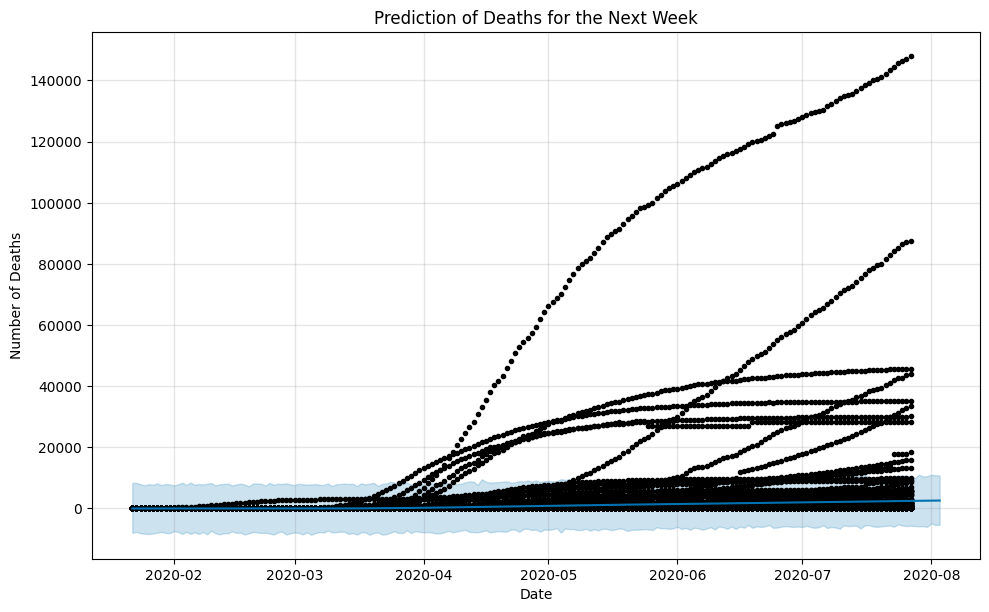

In [72]:
# Rename columns for Prophet compatibility
df_deaths.rename(columns={'Date': 'ds', 'Deaths': 'y'}, inplace=True)

# Create the Prophet model
model_deaths = Prophet()

# Fit the model
model_deaths.fit(df_deaths)

# Make future dataframe for the next 7 days
future_deaths = model_deaths.make_future_dataframe(periods=7)

# Make predictions
forecast_deaths = model_deaths.predict(future_deaths)

# Display the forecasted values
print(forecast_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot the predictions
fig_deaths = model_deaths.plot(forecast_deaths)
plt.title('Prediction of Deaths for the Next Week')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpved0cvw_/28vo1iri.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpved0cvw_/3695w93c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38778', 'data', 'file=/tmp/tmpved0cvw_/28vo1iri.json', 'init=/tmp/tmpved0cvw_/3695w93c.json', 'output', 'file=/tmp/tmpved0cvw_/prophet_model01vk1cmv/prophet_model-20240629125656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:56:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:57:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds          yhat    yhat_lower     yhat_upper
190 2020-07-30  36640.956010 -34444.269331  102944.704784
191 2020-07-31  37175.127796 -30548.379710  104958.831438
192 2020-08-01  37713.349660 -26041.330007  106411.915276
193 2020-08-02  38190.835852 -28092.157753  104895.492876
194 2020-08-03  38704.965161 -29066.625732  108985.115785


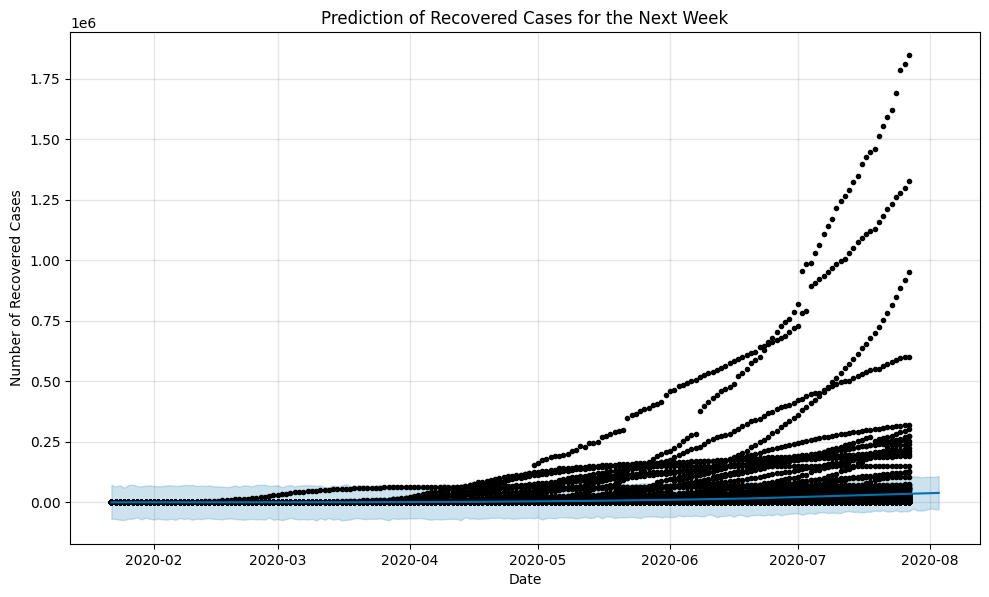

In [73]:
# Rename columns for Prophet compatibility
df_recovered.rename(columns={'Date': 'ds', 'Recovered': 'y'}, inplace=True)

# Create the Prophet model
model_recovered = Prophet()

# Fit the model
model_recovered.fit(df_recovered)

# Make future dataframe for the next 7 days
future_recovered = model_recovered.make_future_dataframe(periods=7)

# Make predictions
forecast_recovered = model_recovered.predict(future_recovered)

# Display the forecasted values
print(forecast_recovered[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot the predictions
fig_recovered = model_recovered.plot(forecast_recovered)
plt.title('Prediction of Recovered Cases for the Next Week')
plt.xlabel('Date')
plt.ylabel('Number of Recovered Cases')
plt.show()